# TensorFlow Implementation
Each input of an image is typically represented as a 3D tensor of ```shape = [height, width, channels]```. A mini-batch is represented as a 4D tensor of ```shape = [mini_batch, height, width, channels]```. The weights of a convolutional layer are represented as a 4D tensor of shape [fh, fw, fn', fn]. The bias terms of a convolutional layer are simply represented as a 1D tensor of shape [fn].

In [5]:
# imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_sample_image

In [6]:
# load sample images
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32) # dataset.shape = (2, 427, 640, 3)
batch_size, height, width, channels = dataset.shape

In [7]:
# create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) # filters.shape = (7, 7, 3, 2)
filters[:,3,:,0] = 1 # vertical line
filters[3,:,:,1] = 1 # horizontal line

In [8]:
# create a graph with input X plus a convolutional layer applyting the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME')

### Here's a further explanation of what the ```tf.nn.conv2d()``` is actually doing:
* X is the input mini-batch
* ```filters``` is the set of filters to apply
* ```strides``` is a 4-element 1D array, where the two central elements are the vertical and horizontal strides. The first and last elements must currently be equal to 1. They may one day be used to specify a batch stride and a channel stride
* ```padding``` can either be "VALID" (do NOT pad) or "SAME" (pad)
![Padding Example](https://cdn.discordapp.com/attachments/296443766305456150/648870781711024140/padding_example.PNG)

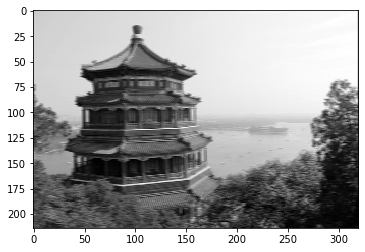

In [9]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
    
plt.imshow(output[0,:,:,1], cmap='gray') # plt 1st image's 2nd feature map

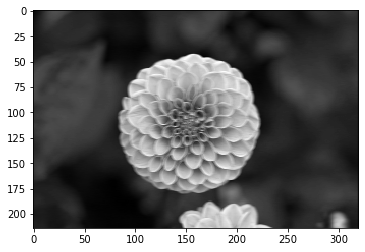

In [10]:
plt.imshow(output[1,:,:,1], cmap='gray') # plt 2nd image's 2nd feature map

## Pooling Layer
So the goal in trying to use CNN's is to try to take subsamples of an image and identify what are the key features of an object that we would like to use to identify it. To do this, we use what's known as a *pooling layer*. Just like in convolutional layers, each neuron in a polling layer is connected to the outputs of a limited number of neurons in the previous layer. The pooling neuron, however, has no weights. All it does is aggregate the inputs using an aggregation function like `max` or `mean`.

Implementing a max pooling layer in TensorFlow is pretty easy, and we'll demonstrate it using the dataset that we loaded above:

In [11]:
# create a graph with input X plus a max pooling layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X: dataset})

The `ksize` parameter contains the kernal shape along all four dimensions of the input tensor.

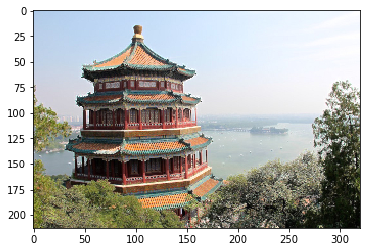

In [12]:
plt.imshow(output[0].astype(np.uint8)) # plot the first image
plt.show()